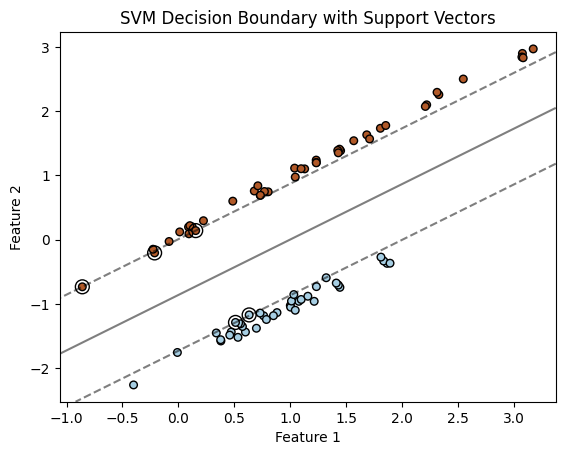

<Figure size 640x480 with 0 Axes>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import os

# Membuat nama file dan path ke folder visualisasi
save_path = "visualisasi"
if not os.path.exists(save_path):
    os.makedirs(save_path)
file_name = os.path.join(save_path, 'SVM decision boundary 1.png')


# For demonstration, create a synthetic 2D dataset
from sklearn.datasets import make_classification

# Generate a random 2D dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

# Plot the decision boundary and support vectors
def plot_svc_decision_boundary(model, X, y):
    # Plot the decision boundary
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired, edgecolors='k')
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary with Support Vectors')
    plt.show()

# Plot the decision boundary
plot_svc_decision_boundary(svc, X_train, y_train)

# Menyimpan plot ke dalam file
plt.savefig(file_name)

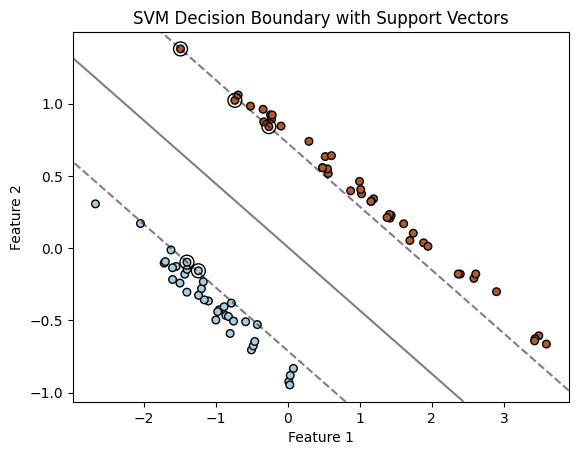

<Figure size 640x480 with 0 Axes>

In [7]:
# Membuat nama file dan path ke folder visualisasi
save_path = "visualisasi"
if not os.path.exists(save_path):
    os.makedirs(save_path)
file_name = os.path.join(save_path, 'SVM decision boundary 2.png')

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Split the reduced data into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the SVM model on the reduced data
svc_reduced = SVC(kernel="linear")
svc_reduced.fit(X_train_reduced, y_train)

# Plot the decision boundary for the reduced data
plot_svc_decision_boundary(svc_reduced, X_train_reduced, y_train)

# Menyimpan plot ke dalam file
plt.savefig(file_name)

plt.show()